<a href="https://www.kaggle.com/code/bhavinmoriya/python-for-finance-financial-data-analysis?scriptVersionId=115334633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall do Chapter from : https://www.amazon.com.br/Python-Finance-2e-Yves-Hilpisch/dp/1492024333

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, timedelta as td
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
start = dt.today() - td(days=5000)
dax = web.get_data_stooq('^DAX',start=start)
dax = dax.iloc[::-1] # for some reason it starts with end date so we revese
dax

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-27,4625.41,4712.03,4571.54,4694.07,133281607.0
2009-04-28,4659.81,4661.20,4547.90,4607.42,139148006.0
2009-04-29,4617.01,4722.11,4611.54,4704.56,152123961.0
2009-04-30,4732.90,4837.05,4710.09,4769.45,184338126.0
2009-05-04,4790.03,4908.88,4781.97,4902.45,122411739.0
...,...,...,...,...,...
2022-12-27,14047.42,14063.14,13966.35,13995.10,NaN
2022-12-28,14013.72,14018.47,13914.62,13925.60,NaN
2022-12-29,13890.81,14071.72,13871.32,14071.72,NaN


In [3]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3476 entries, 2009-04-27 to 2023-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3476 non-null   float64
 1   High    3476 non-null   float64
 2   Low     3476 non-null   float64
 3   Close   3476 non-null   float64
 4   Volume  2922 non-null   float64
dtypes: float64(5)
memory usage: 162.9 KB


In [4]:
dax.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-27,14047.42,14063.14,13966.35,13995.10,NaN
2022-12-28,14013.72,14018.47,13914.62,13925.60,NaN
2022-12-29,13890.81,14071.72,13871.32,14071.72,NaN
2022-12-30,14005.84,14008.97,13922.55,13923.59,NaN
2023-01-02,13992.71,14095.91,13976.44,14069.26,NaN


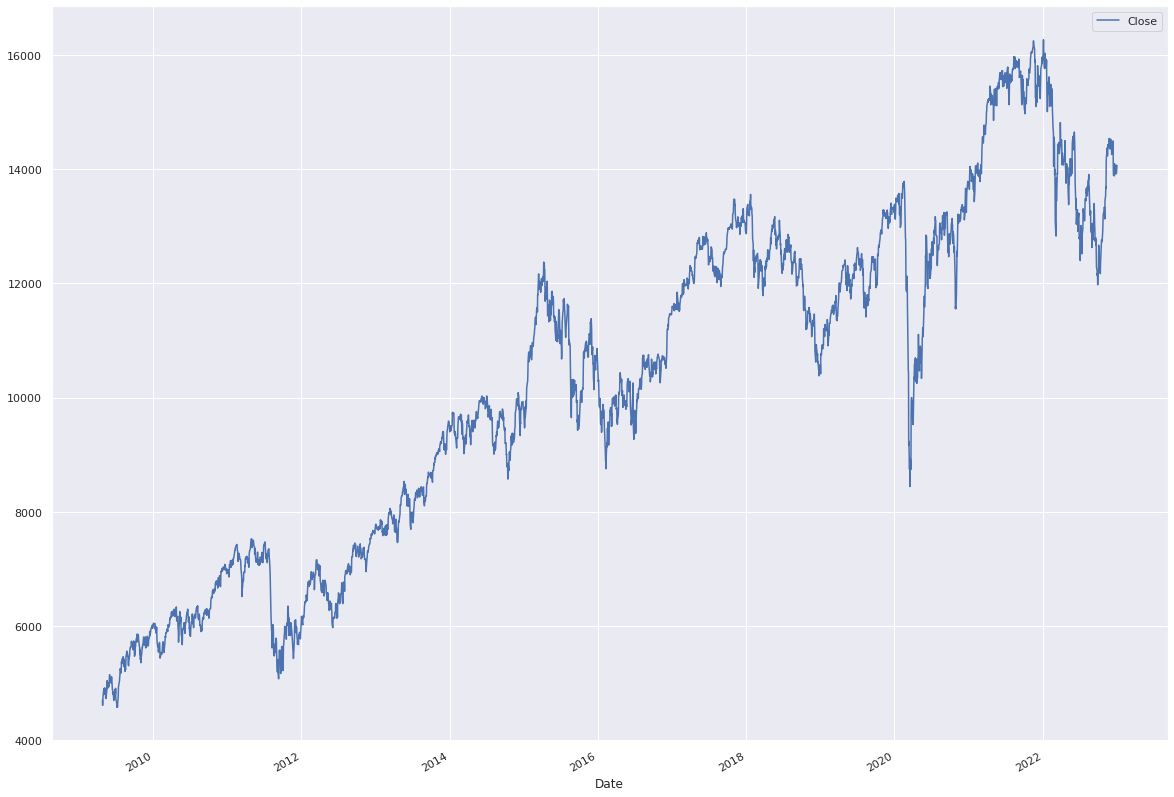

In [5]:
dax.Close.plot(figsize=(20,15),
              legend=True);

In [6]:
dax['log_ret'] = np.log(dax.Close / dax.Close.shift(1))

<AxesSubplot:xlabel='Date'>

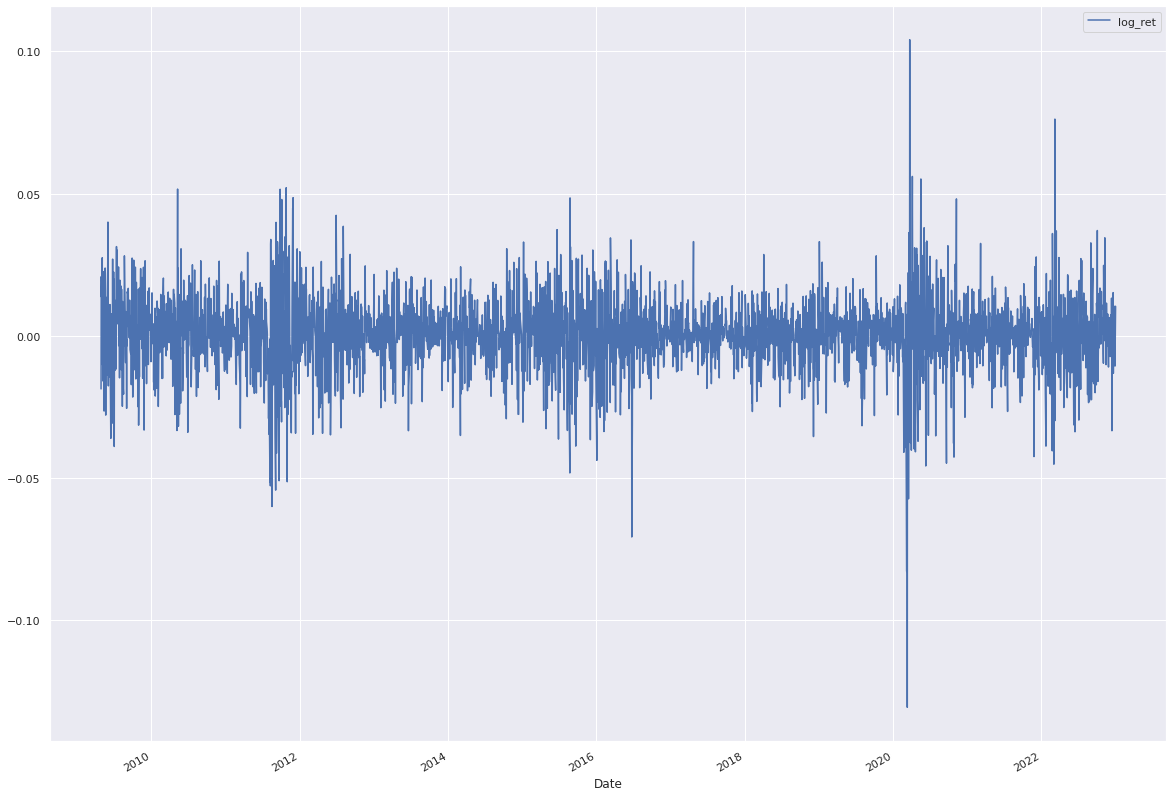

In [7]:
dax.log_ret.plot(figsize=(20,15),
                legend=True)

# Moving averages 

You could smooth it using Kalman Filter : https://www.kaggle.com/code/bhavinmoriya/kalman-filter-kf-in-finance

In [8]:
# rolling mean
# 
dax['42d'] = dax['Close'].rolling(window=42).mean()
dax['252d'] = dax['Close'].rolling(window=252).mean()
dax.iloc[:,-3:]

,log_ret,42d,252d
Date,,,
2009-04-27,NaN,NaN,NaN
2009-04-28,-0.018632,NaN,NaN
2009-04-29,0.020864,NaN,NaN
2009-04-30,0.013699,NaN,NaN
2009-05-04,0.027504,NaN,NaN
...,...,...,...
2022-12-27,0.003878,14086.650000,13856.020159
2022-12-28,-0.004978,14102.894524,13846.710040
2022-12-29,0.010438,14122.370238,13838.851667


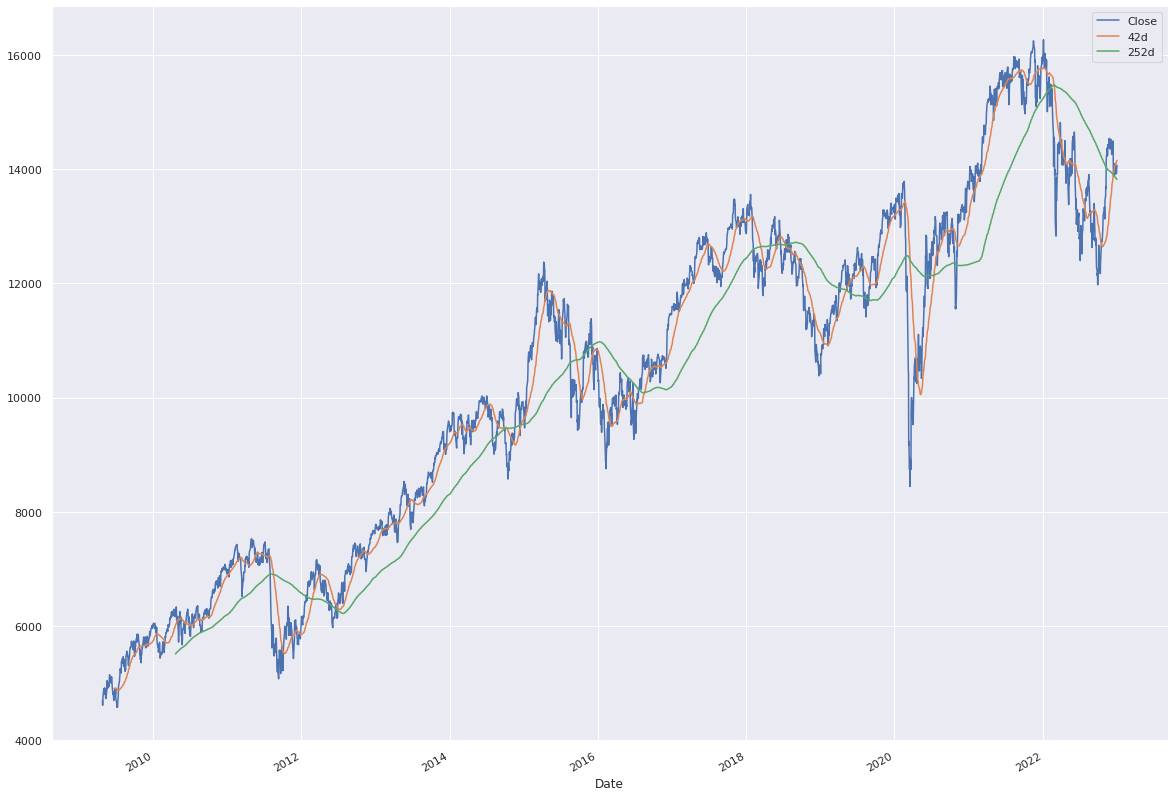

In [9]:
dax[['Close', '42d', '252d']].plot(figsize=(20, 15));

<AxesSubplot:xlabel='Date'>

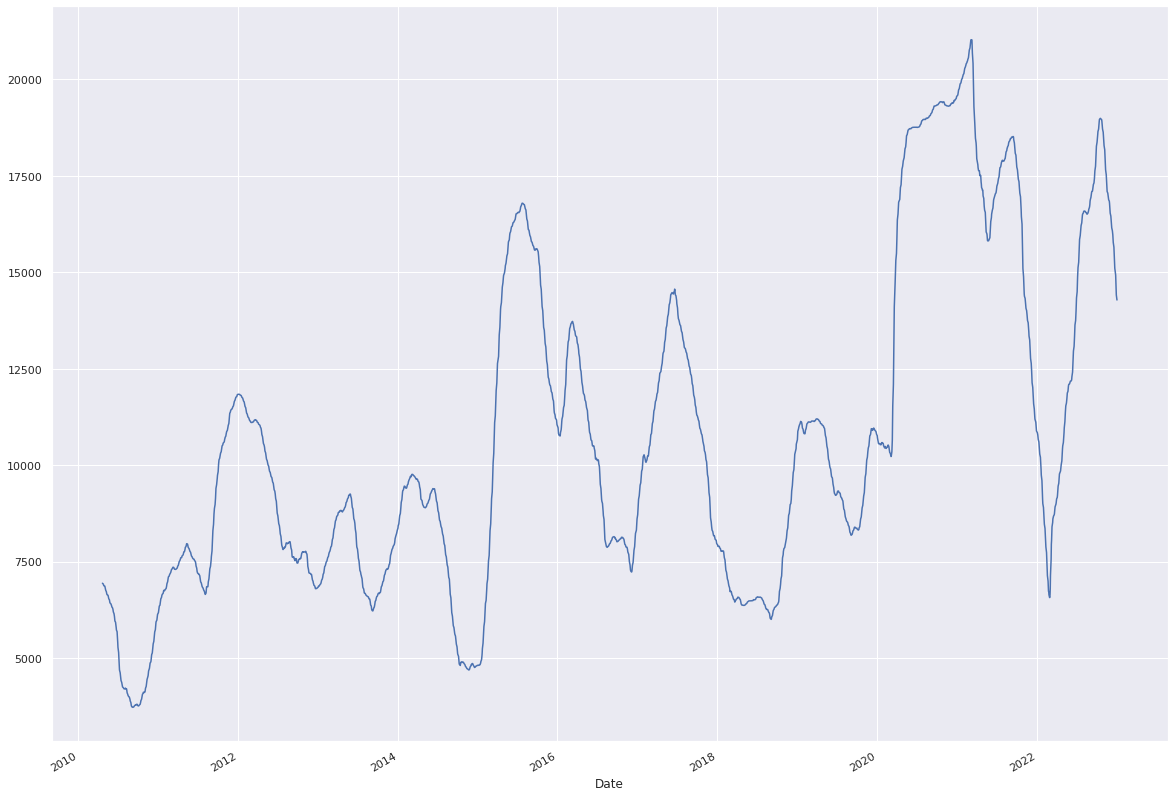

In [10]:
dax['Mov_Vol'] = dax.Close.rolling(252).std() * np.sqrt(252)
dax['Mov_Vol'].plot(figsize=(20,15))

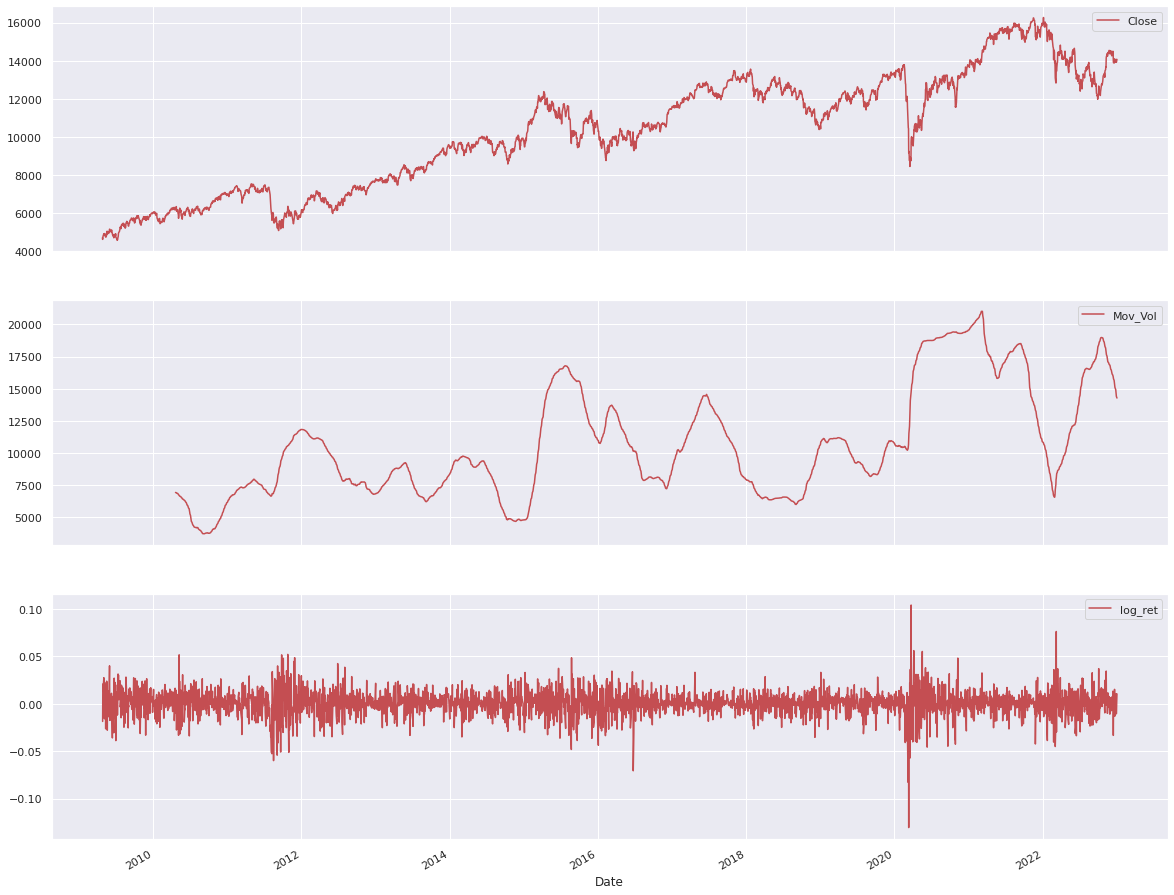

In [11]:
dax[['Close', 'Mov_Vol', 'log_ret']].plot(subplots=True, style='r',
figsize=(20, 17));

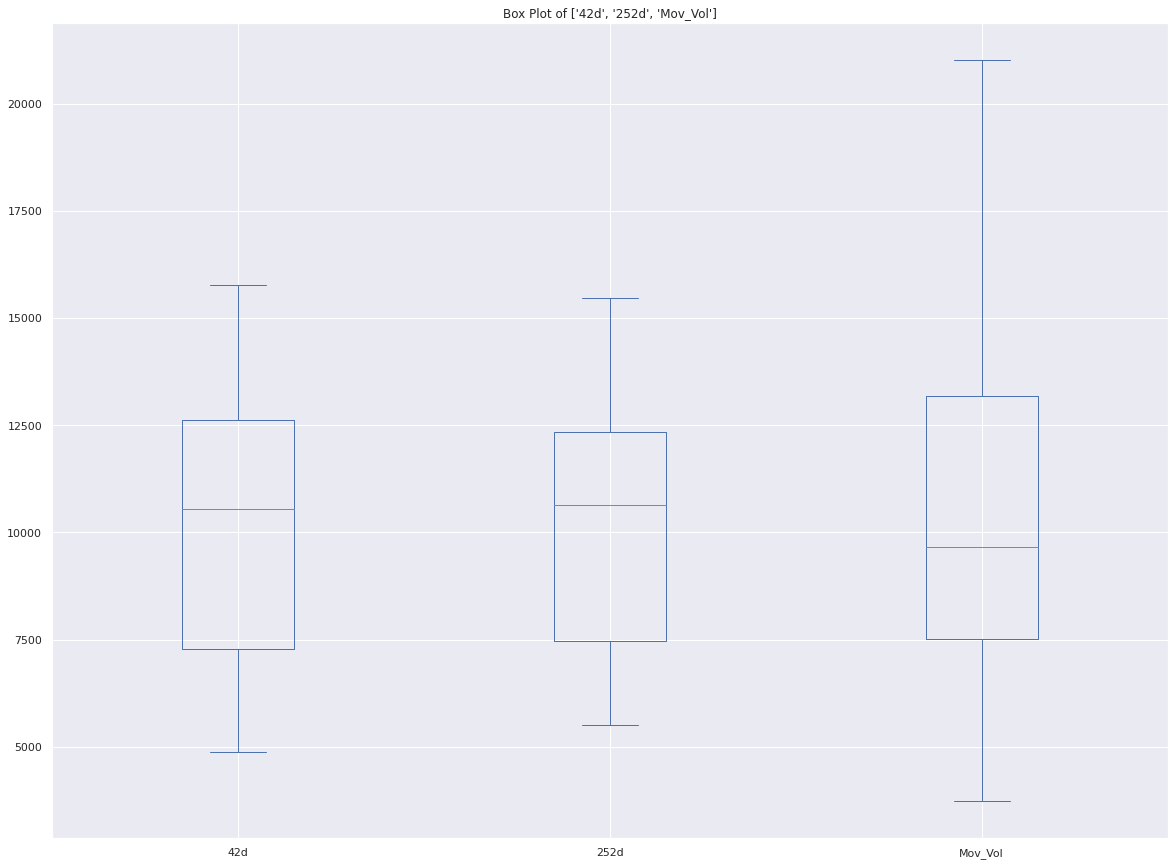

In [12]:
dax.iloc[:, -3:].plot(kind='box',
                     figsize=(20,15));
plt.title(f'Box Plot of {list(dax.iloc[:, -3:].columns)}');

Let us analyse some more data.

In [13]:
url = 'https://raw.githubusercontent.com/yhilpisch/py4fi/master/jupyter36/source/tr_eikon_eod_data.csv'
data = pd.read_csv(url,
                   index_col=0,
                   parse_dates=True)
raw = data[['.SPX', '.VIX']]
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,156.410000,78.630,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.410000,78.760,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.050000,83.810,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [15]:
data.isna().sum()

AAPL.O    0
MSFT.O    0
INTC.O    0
AMZN.O    0
GS.N      0
SPY       0
.SPX      0
.VIX      0
EUR=      0
XAU=      0
GDX       0
GLD       0
dtype: int64

No missing data.

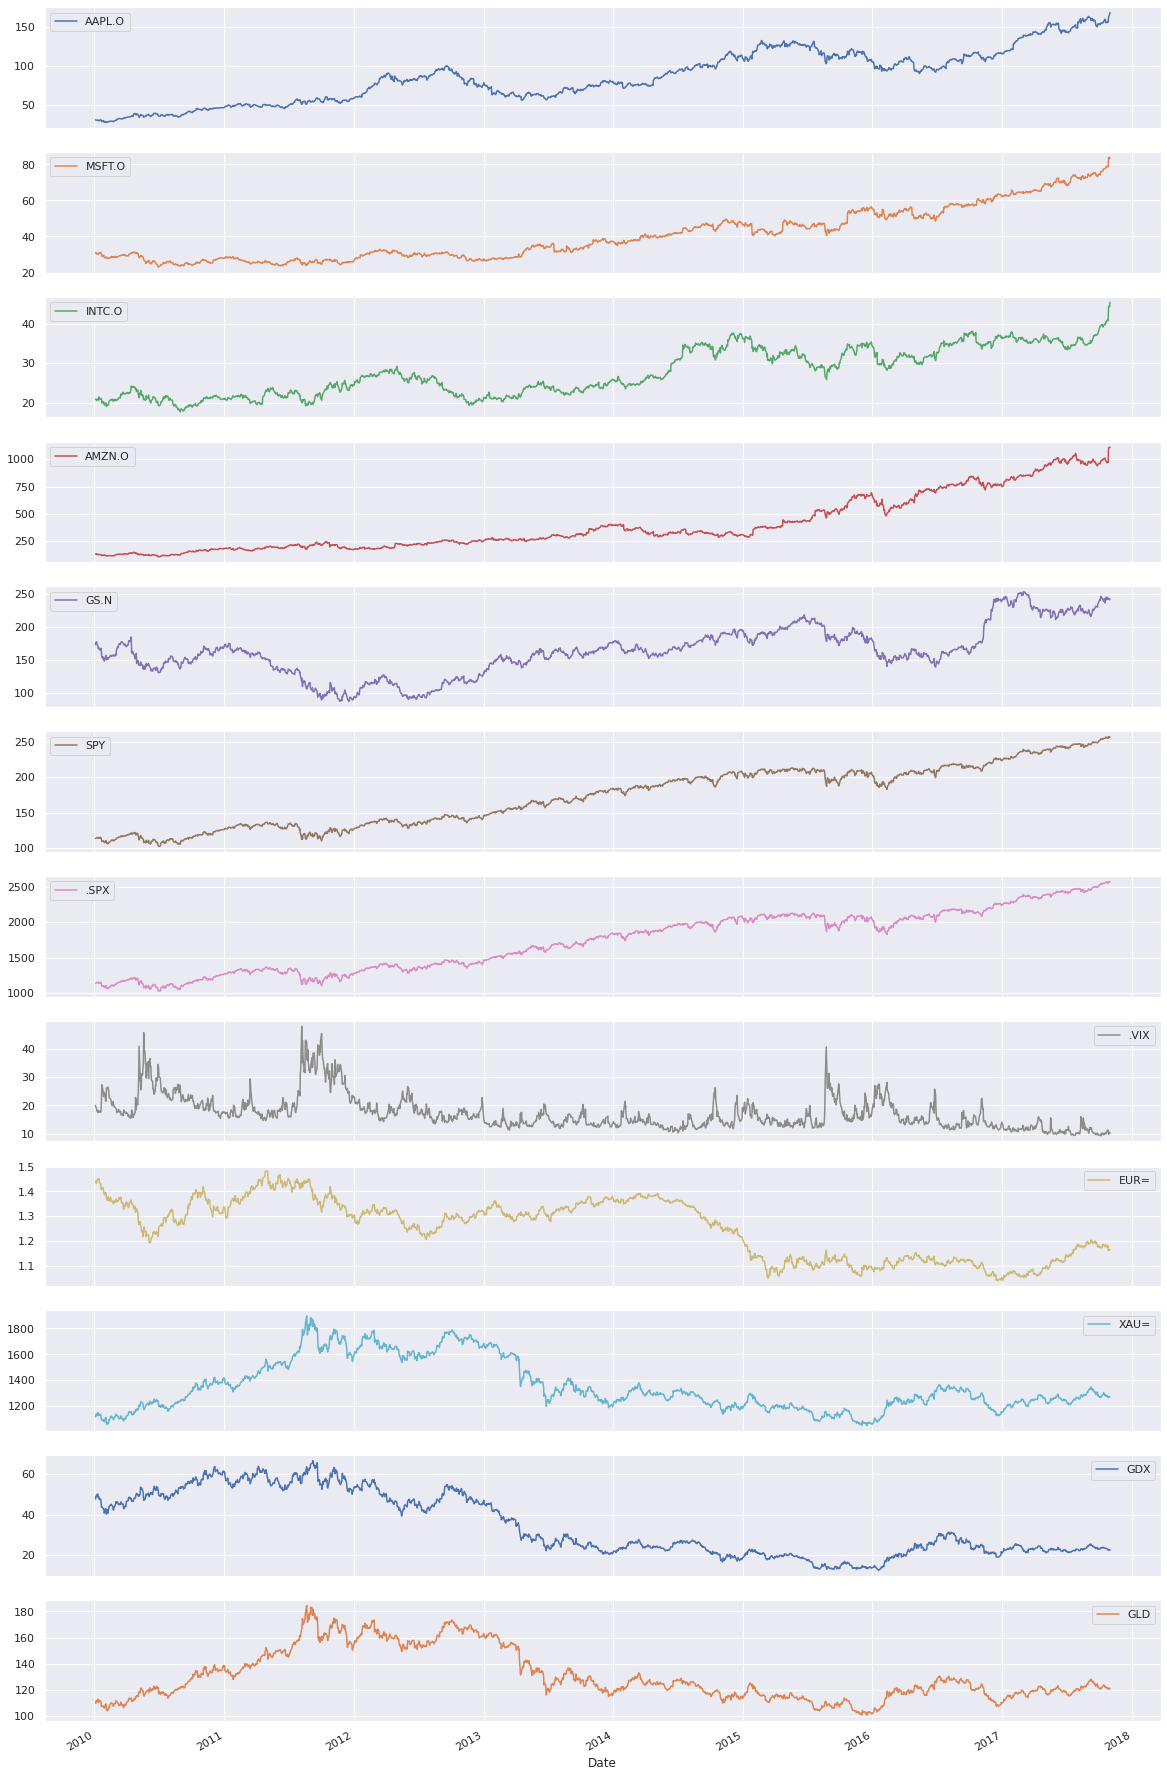

In [16]:
data.plot(figsize=(20, 35), subplots=True);

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR world
symbols for financial instruments are called Reuters Instrument Codes (RICs). The
financial instruments that the single RICs represent are:

In [17]:
instruments = ['Apple Stock', 'Microsoft Stock',
'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
'VIX Volatility Index', 'EUR/USD Exchange Rate',
'Gold Price', 'VanEck Vectors Gold Miners ETF',
'SPDR Gold Trust']


for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [18]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
AAPL.O,1972.0,86.53,34.04,27.44,57.57,84.63,111.87,169.04
MSFT.O,1972.0,40.59,14.39,23.01,28.12,36.54,50.08,83.89
INTC.O,1972.0,27.70,5.95,17.66,22.23,26.41,33.74,45.49
AMZN.O,1972.0,401.15,257.12,108.61,202.66,306.42,559.45,1110.85
GS.N,1972.0,163.61,37.17,87.70,144.23,162.09,184.11,252.89
SPY,1972.0,172.84,42.33,102.20,132.64,178.80,208.01,257.71
.SPX,1972.0,1727.54,424.35,1022.58,1325.53,1783.81,2080.15,2581.07
.VIX,1972.0,17.21,5.92,9.19,13.25,15.65,19.20,48.00
EUR=,1972.0,1.25,0.12,1.04,1.13,1.29,1.35,1.48
XAU=,1972.0,1352.47,195.38,1051.36,1214.56,1288.82,1491.98,1897.10


In [19]:
data.aggregate([min,
np.mean,
np.std,
np.median,
max]
)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.190000,1.038500,1051.360000,12.470000,100.500000
mean,86.530152,40.586752,27.701411,401.154006,163.614625,172.835399,1727.538342,17.209498,1.252613,1352.471593,34.499391,130.601856
std,34.043491,14.394848,5.950847,257.115788,37.165334,42.325489,424.345659,5.918398,0.117224,195.383137,15.435140,19.455291
median,84.632058,36.540000,26.410000,306.425000,162.090000,178.805000,1783.810000,15.650000,1.288400,1288.820000,26.594000,123.895000
max,169.040000,83.890000,45.490000,1110.850000,252.890000,257.710000,2581.070000,48.000000,1.482600,1897.100000,66.630000,184.590000


In [20]:
data.diff() # today - yesterday

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,-0.690000,-0.230,-0.17,-2.99,-3.13,-1.27,-11.98,0.07,0.0053,0.68,-0.12,0.02
2017-10-26,1.000000,0.130,0.57,-0.48,0.01,0.33,3.25,0.07,-0.0162,-10.28,-0.40,-1.02
2017-10-27,5.640000,5.050,3.05,128.52,-0.01,2.09,20.67,-1.50,-0.0042,5.87,0.14,0.57


In [21]:
data - data.shift() # would give the exact same result as diff above

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,-0.690000,-0.230,-0.17,-2.99,-3.13,-1.27,-11.98,0.07,0.0053,0.68,-0.12,0.02
2017-10-26,1.000000,0.130,0.57,-0.48,0.01,0.33,3.25,0.07,-0.0162,-10.28,-0.40,-1.02
2017-10-27,5.640000,5.050,3.05,128.52,-0.01,2.09,20.67,-1.50,-0.0042,5.87,0.14,0.57


In [22]:
data.pct_change()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.000323,-0.000479,0.005900,0.017680,0.002647,0.003116,-0.034431,-0.002984,-0.001205,0.009642,-0.000911
2010-01-06,-0.015906,-0.006137,-0.003354,-0.018116,-0.010673,0.000704,0.000546,-0.009819,0.003062,0.017745,0.024289,0.016500
2010-01-07,-0.001849,-0.010335,-0.009615,-0.017013,0.019568,0.004221,0.004001,-0.005219,-0.006522,-0.005797,-0.004864,-0.006188
2010-01-08,0.006648,0.006830,0.011165,0.027077,-0.018911,0.003328,0.002882,-0.048793,0.006565,0.003711,0.015071,0.004963
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,-0.004392,-0.002917,-0.004151,-0.003064,-0.012784,-0.004950,-0.004663,0.006272,0.004507,0.000533,-0.005229,0.000165
2017-10-26,0.006393,0.001653,0.013977,-0.000493,0.000041,0.001293,0.001271,0.006233,-0.013715,-0.008050,-0.017521,-0.008405
2017-10-27,0.035830,0.064119,0.073761,0.132164,-0.000041,0.008176,0.008073,-0.132743,-0.003605,0.004634,0.006242,0.004737


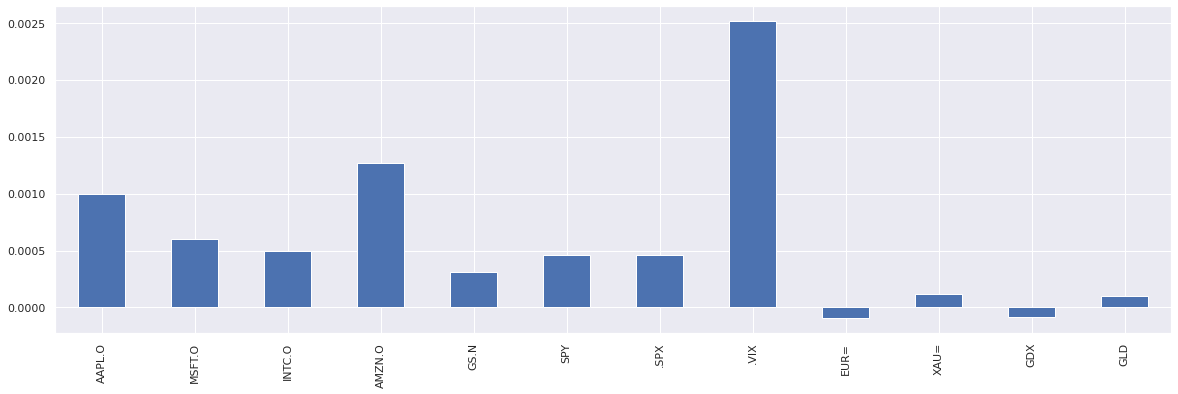

In [23]:
data.pct_change().mean().plot(kind='bar', figsize=(20, 6),
                             );

In [24]:
rets = np.log(data / data.shift(1))
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006544,0.003704,0.014959,0.004951
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,-0.004402,-0.002921,-0.004160,-0.003069,-0.012866,-0.004962,-0.004674,0.006253,0.004497,0.000533,-0.005242,0.000165
2017-10-26,0.006373,0.001652,0.013881,-0.000493,0.000041,0.001292,0.001270,0.006214,-0.013810,-0.008083,-0.017676,-0.008441
2017-10-27,0.035203,0.062147,0.071167,0.124131,-0.000041,0.008143,0.008041,-0.142420,-0.003612,0.004623,0.006222,0.004726


In [25]:
cumrets = rets.cumsum()
cumrets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.014307,-0.005833,-0.003839,-0.012399,0.006795,0.003347,0.003656,-0.044906,0.000069,0.016383,0.033594,0.015454
2010-01-07,-0.016157,-0.016221,-0.013501,-0.029559,0.026174,0.007560,0.007649,-0.050138,-0.006474,0.010569,0.028718,0.009247
2010-01-08,-0.009531,-0.009414,-0.002398,-0.002842,0.007081,0.010882,0.010527,-0.100162,0.000069,0.014273,0.043677,0.014197
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,1.632369,0.932380,0.669400,1.983198,0.333985,0.812096,0.814033,-0.579142,-0.198876,0.131193,-0.737066,0.100018
2017-10-26,1.638742,0.934032,0.683281,1.982705,0.334026,0.813388,0.815303,-0.572928,-0.212686,0.123110,-0.754742,0.091577
2017-10-27,1.673945,0.996179,0.754448,2.106835,0.333985,0.821531,0.823344,-0.715348,-0.216297,0.127733,-0.748519,0.096303


In [26]:
np.exp(cumrets) # np.exp(rets.cumsum()) # i-th row gives the data[i]-data[0]

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.001729,1.000323,0.999521,1.005900,1.017680,1.002647,1.003116,0.965569,0.997016,0.998795,1.009642,0.999089
2010-01-06,0.985795,0.994184,0.996169,0.987677,1.006818,1.003353,1.003663,0.956088,1.000069,1.016518,1.034165,1.015574
2010-01-07,0.983973,0.983910,0.986590,0.970874,1.026520,1.007588,1.007679,0.951098,0.993547,1.010625,1.029134,1.009290
2010-01-08,0.990514,0.990630,0.997605,0.997162,1.007107,1.010941,1.010583,0.904691,1.000069,1.014375,1.044645,1.014299
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,5.115981,2.540549,1.953065,7.265945,1.396522,2.252625,2.256993,0.560379,0.819652,1.140188,0.478516,1.105191
2017-10-26,5.148690,2.544750,1.980364,7.262360,1.396580,2.255537,2.259861,0.563872,0.808410,1.131009,0.470132,1.095902
2017-10-27,5.333167,2.707916,2.126437,8.222181,1.396522,2.273979,2.278105,0.489022,0.805496,1.136250,0.473066,1.101093


<AxesSubplot:>

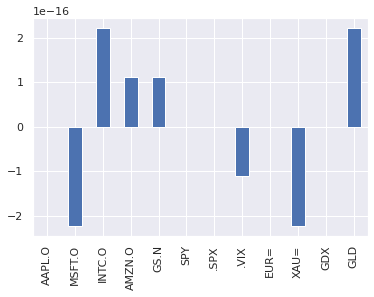

In [27]:
# as we said,
# np.exp(rets.cumsum()) # i-th row gives the data[i]-data[0]

(data.iloc[10,:]/ data.iloc[0,:]- np.exp(rets.cumsum()).iloc[10,:]).plot(kind='bar')

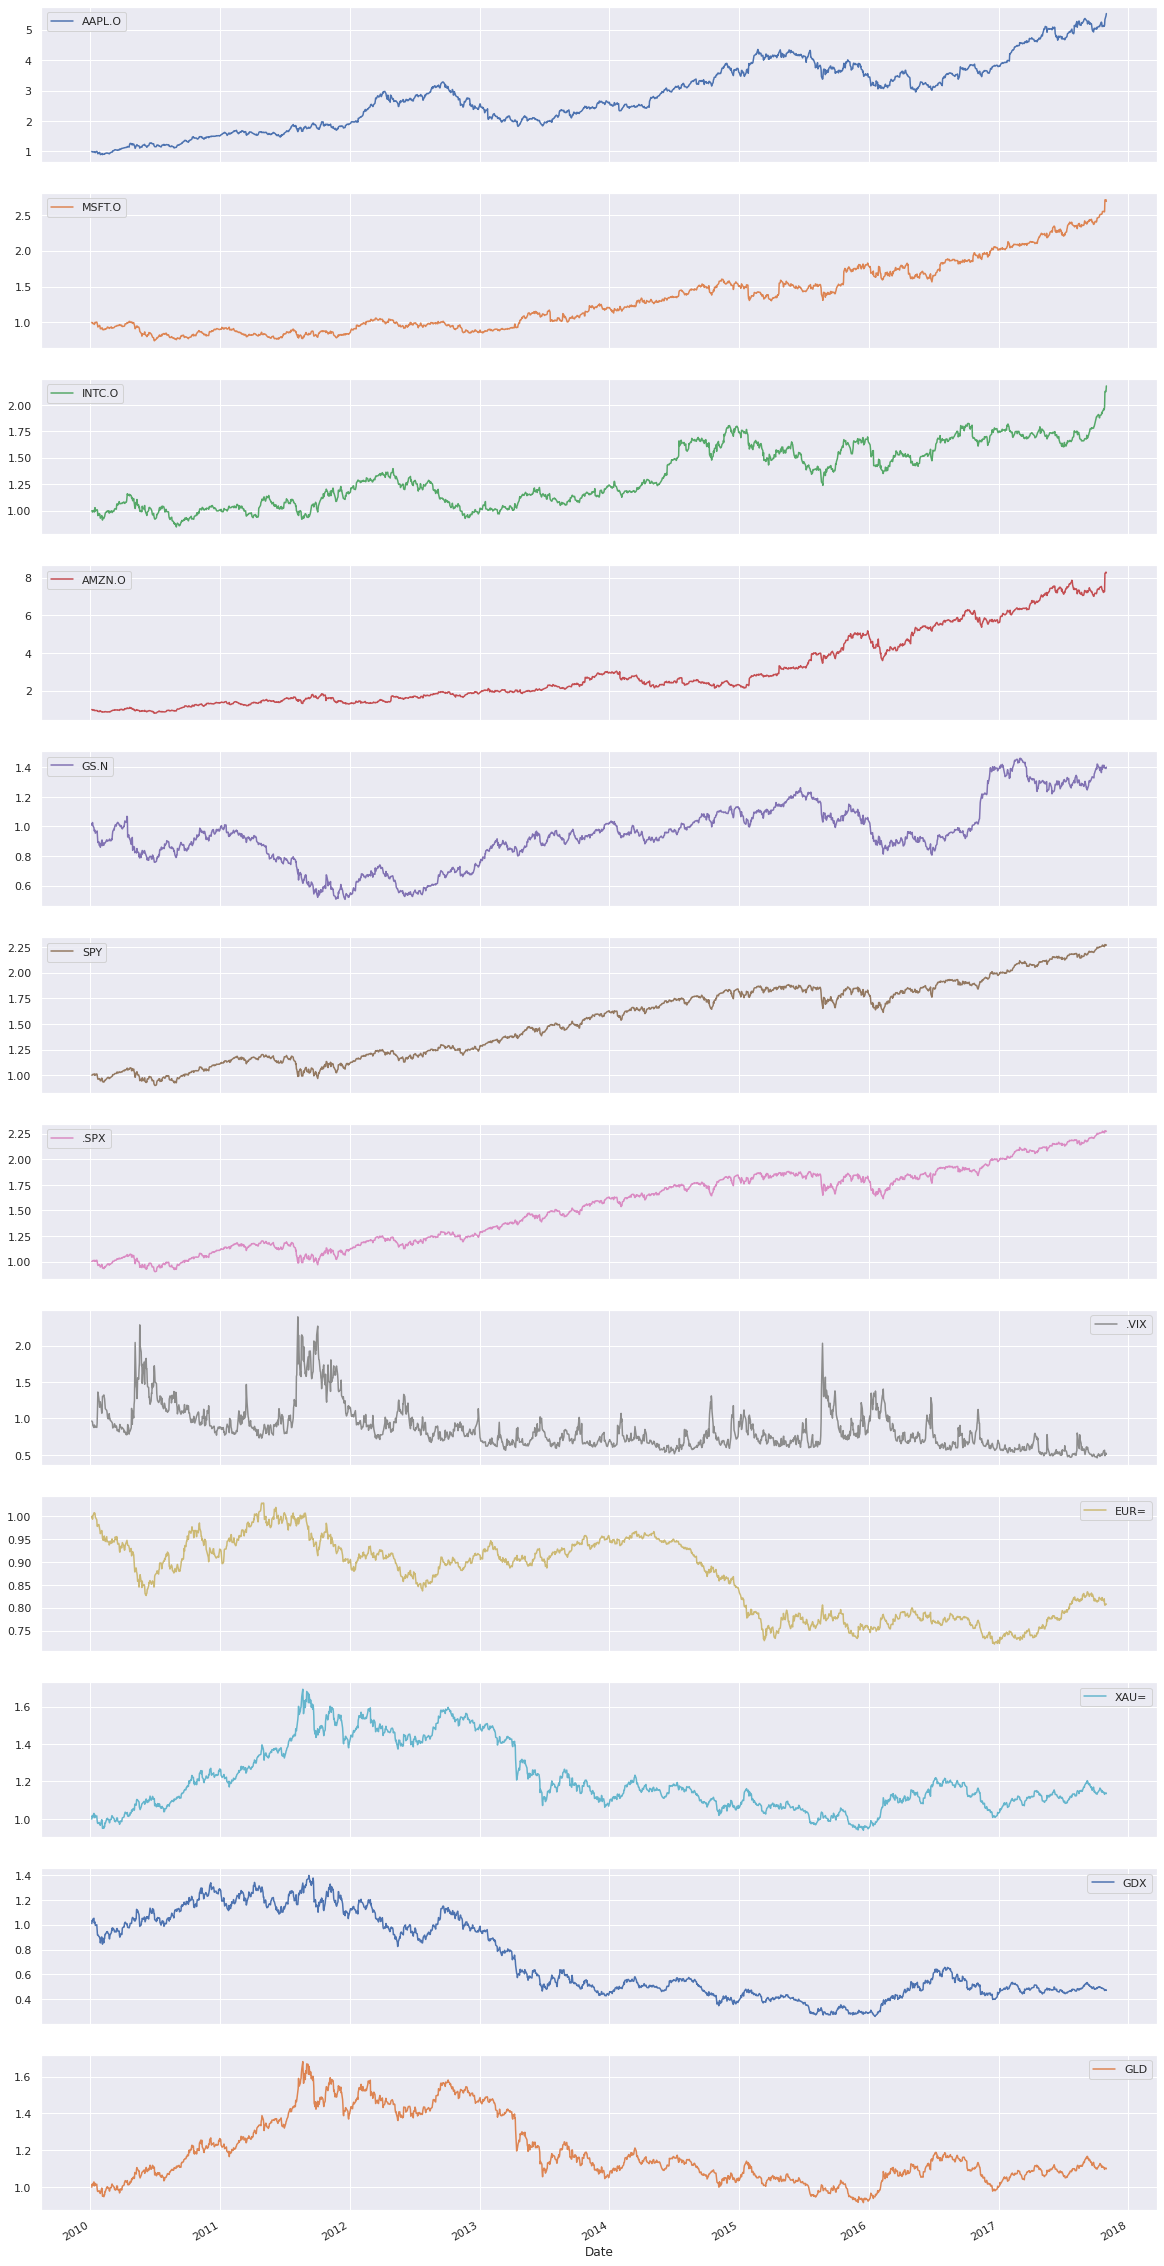

In [28]:
np.exp(cumrets).plot(figsize=(20,45), subplots=True);

Microsoft Apple Amazon etc seem to be the stock that if we bought and hold then we would have made some money.

In [29]:
data.resample('1w', label='left').last()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-10,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-17,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-24,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-01-31,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,155.300000,76.00,39.63,989.58,246.02,254.37,2549.33,9.65,1.1733,1275.30,23.59,121.09
2017-10-08,156.990000,77.49,39.67,1002.94,238.53,254.95,2553.17,9.61,1.1822,1304.47,23.84,123.82
2017-10-15,156.250000,78.81,40.43,982.91,244.73,257.11,2575.21,9.97,1.1783,1280.33,23.23,121.61


In [30]:
data.head(7)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49


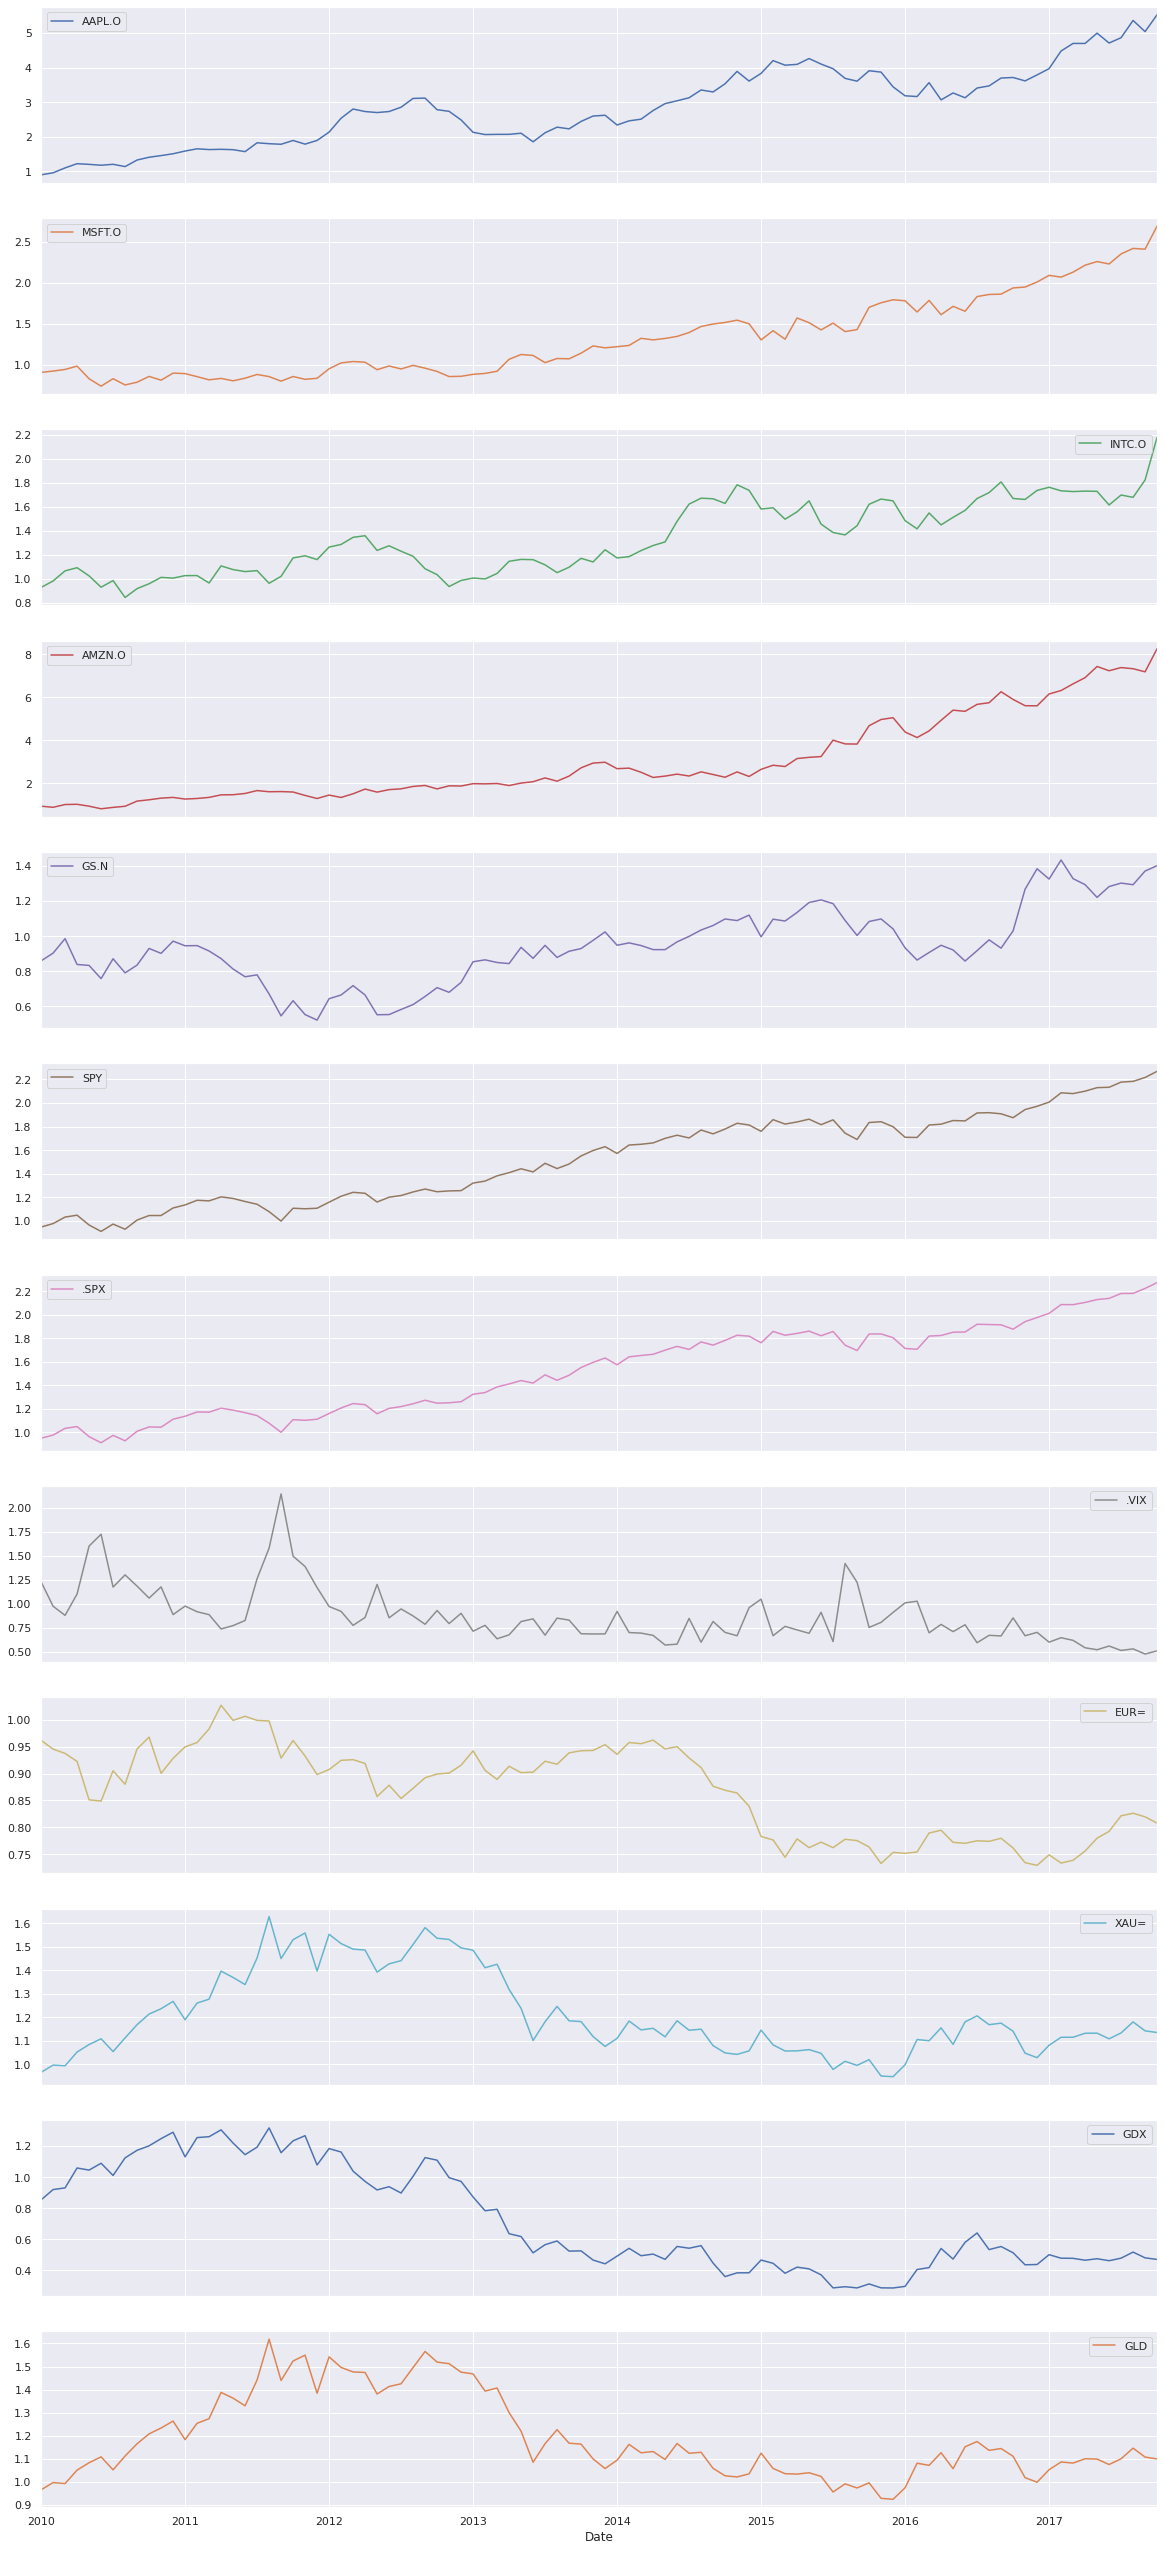

In [31]:
(rets
 .cumsum()
 .apply(np.exp)
 .resample('1m', label='right')
 .last()
 .plot(figsize=(20, 46), subplots=True)
);

In [32]:
data = data[['AAPL.O']]
data

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2017-10-25,156.410000
2017-10-26,157.410000
2017-10-27,163.050000


In [33]:
window = 20

data['mean'] = data['AAPL.O'].rolling(window).mean()
data['min'] = data['AAPL.O'].rolling(window).min()
data['max'] = data['AAPL.O'].rolling(window).max()
data['std'] = data['AAPL.O'].rolling(window).std()
data['median'] = data['AAPL.O'].rolling(window).median()
data['ewma'] = data['AAPL.O'].ewm(halflife=0.5, min_periods=window).mean()
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,AAPL.O,mean,min,max,std,median,ewma
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2017-10-25,156.410000,156.1580,153.28,160.47,2.009366,155.990,156.528352
2017-10-26,157.410000,156.3645,153.48,160.47,1.907676,156.085,157.189588
2017-10-27,163.050000,156.8110,153.48,163.05,2.348753,156.210,161.584897


In [34]:
data.isna().sum()

AAPL.O     0
mean      19
min       19
max       19
std       19
median    19
ewma      19
dtype: int64

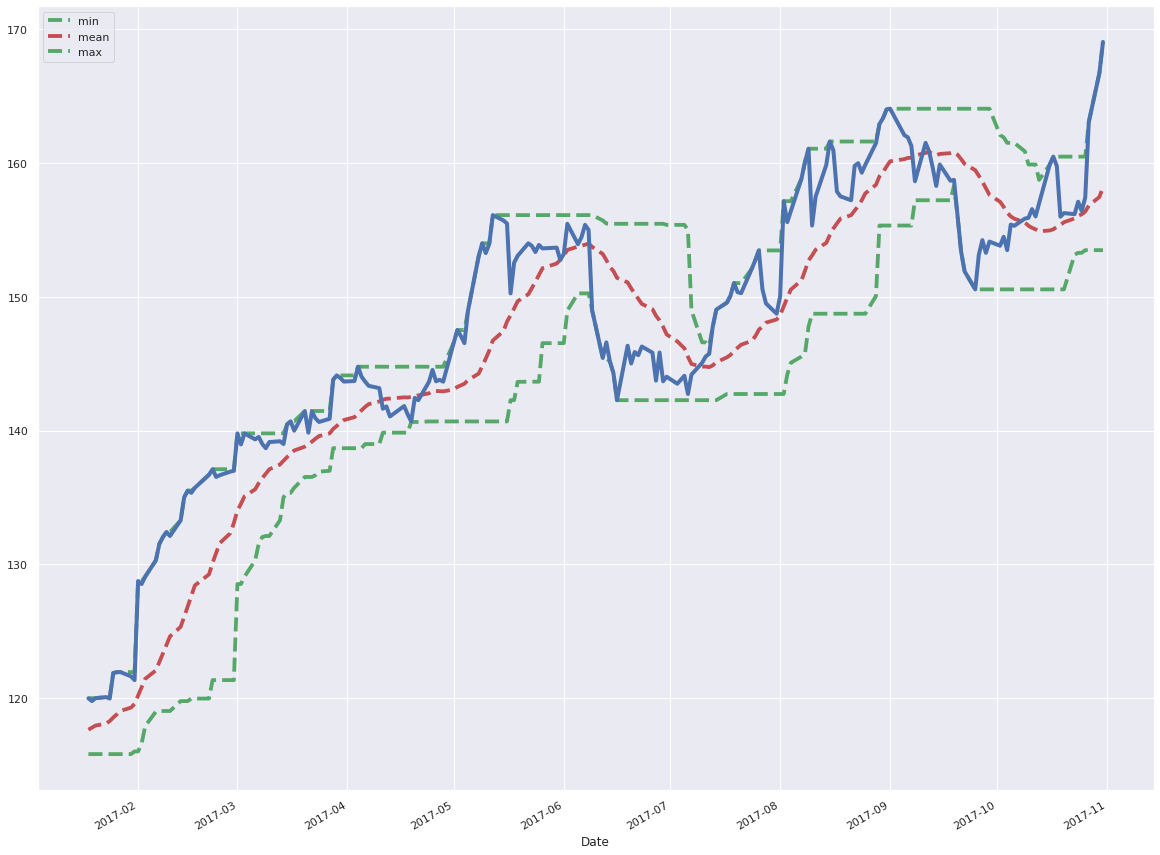

In [35]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(20, 16), style=['g--', 'r--', 'g--'], lw=3.8)

data['AAPL.O'].iloc[-200:].plot(ax=ax, lw=4.0);

In [36]:
sym = 'AAPL.O'

data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()
data[[sym, 'SMA1', 'SMA2']].tail()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,AAPL.O,SMA1,SMA2
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


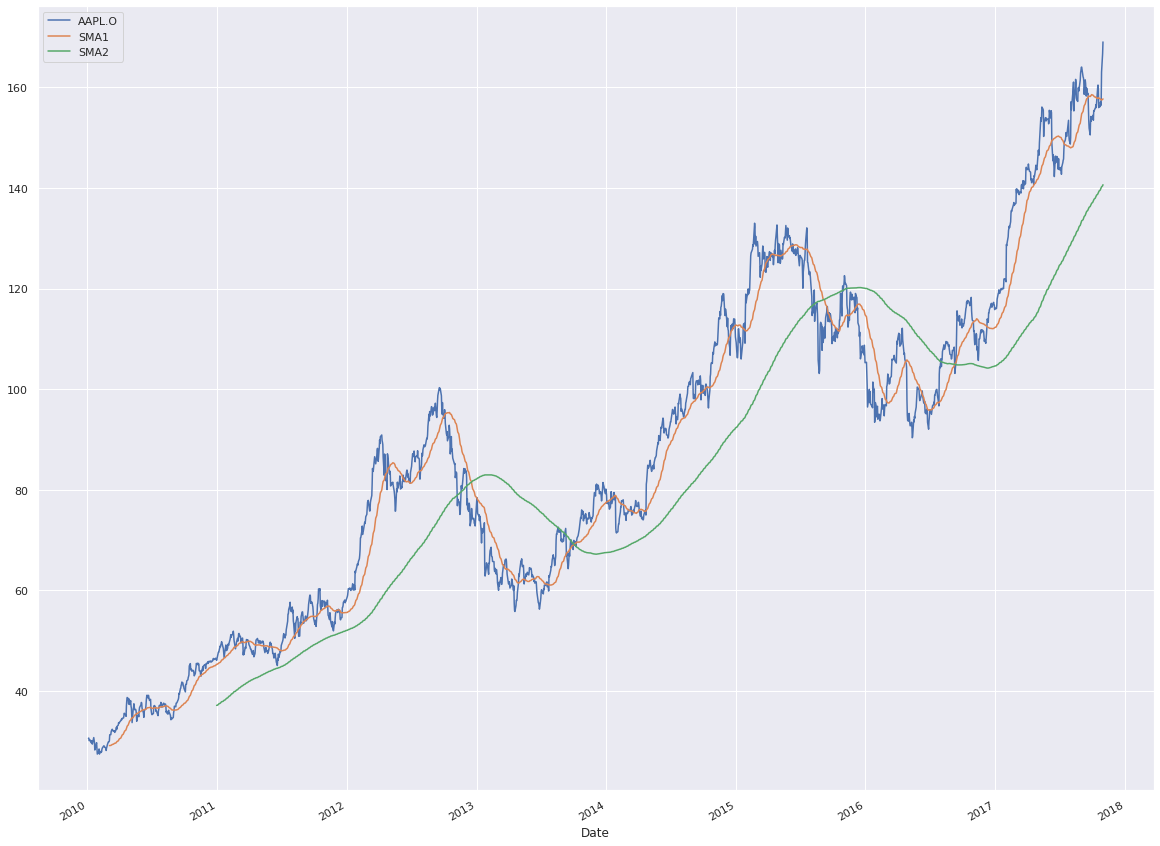

In [37]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(20, 16),
                                subplots=False);

In [38]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


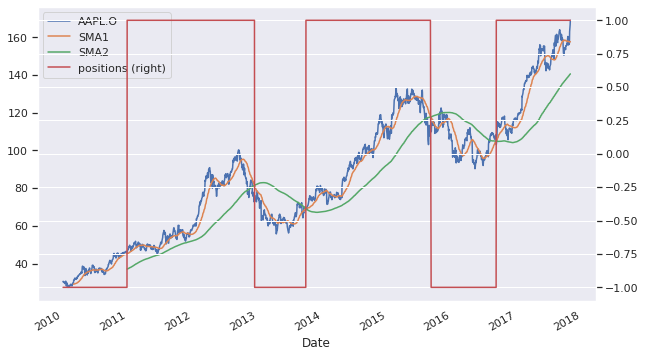

In [39]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')

In [40]:
data['positions']

Date
2010-01-04   -1
2010-01-05   -1
2010-01-06   -1
2010-01-07   -1
2010-01-08   -1
             ..
2017-10-25    1
2017-10-26    1
2017-10-27    1
2017-10-30    1
2017-10-31    1
Name: positions, Length: 1972, dtype: int64

In [41]:
def check_missing(df):
    return df.isna().sum()

In [42]:
raw.apply(check_missing)

.SPX    0
.VIX    0
dtype: int64

In [43]:
raw.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


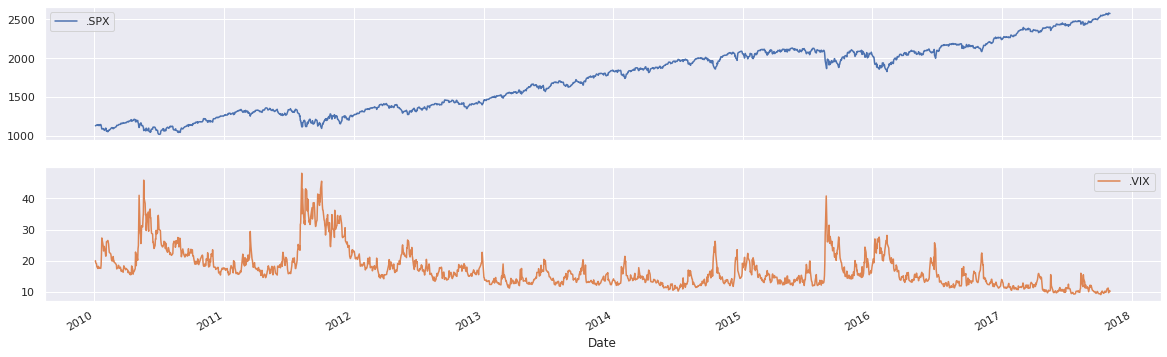

In [44]:
raw.plot(subplots=True, figsize=(20, 6));

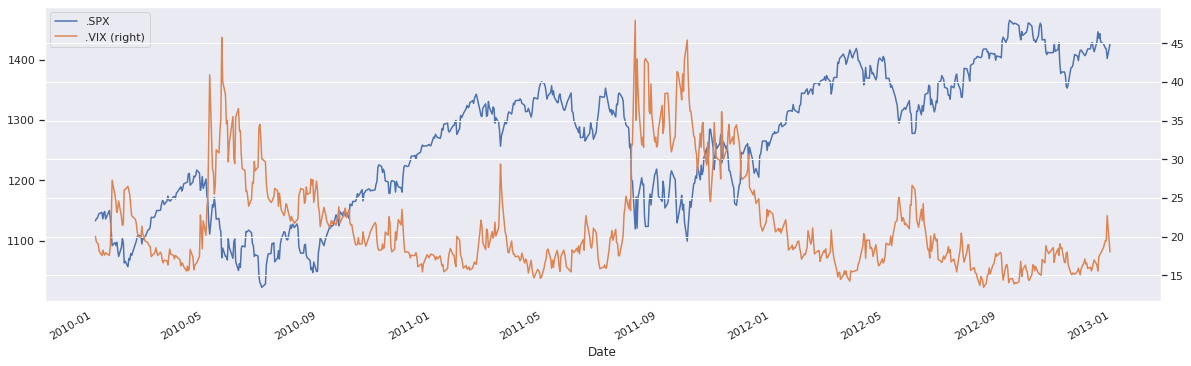

In [45]:
raw.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(20, 6));

As you can see when one goes up other goes down and vice versa. So there is negative correlation between two indexes.

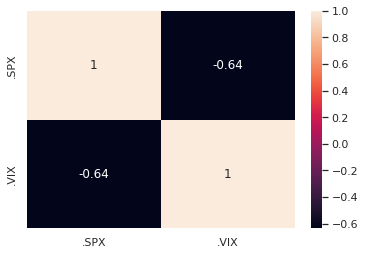

In [46]:
sns.heatmap(raw.corr(), annot=True);

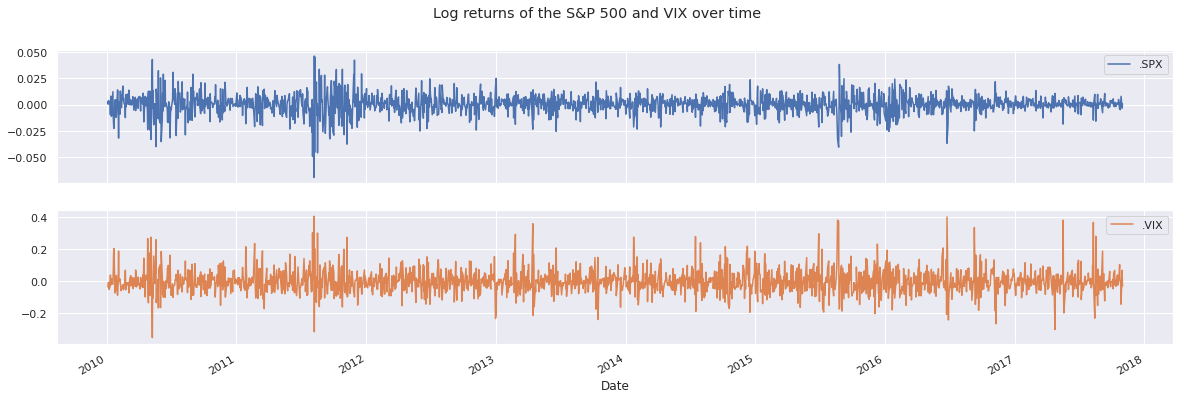

In [47]:
rets = np.log(raw / raw.shift())
rets.plot(subplots=True, figsize=(20, 6),title='Log returns of the S&P 500 and VIX over time');
# plt.title('Log returns of the S&P 500 and VIX over time');

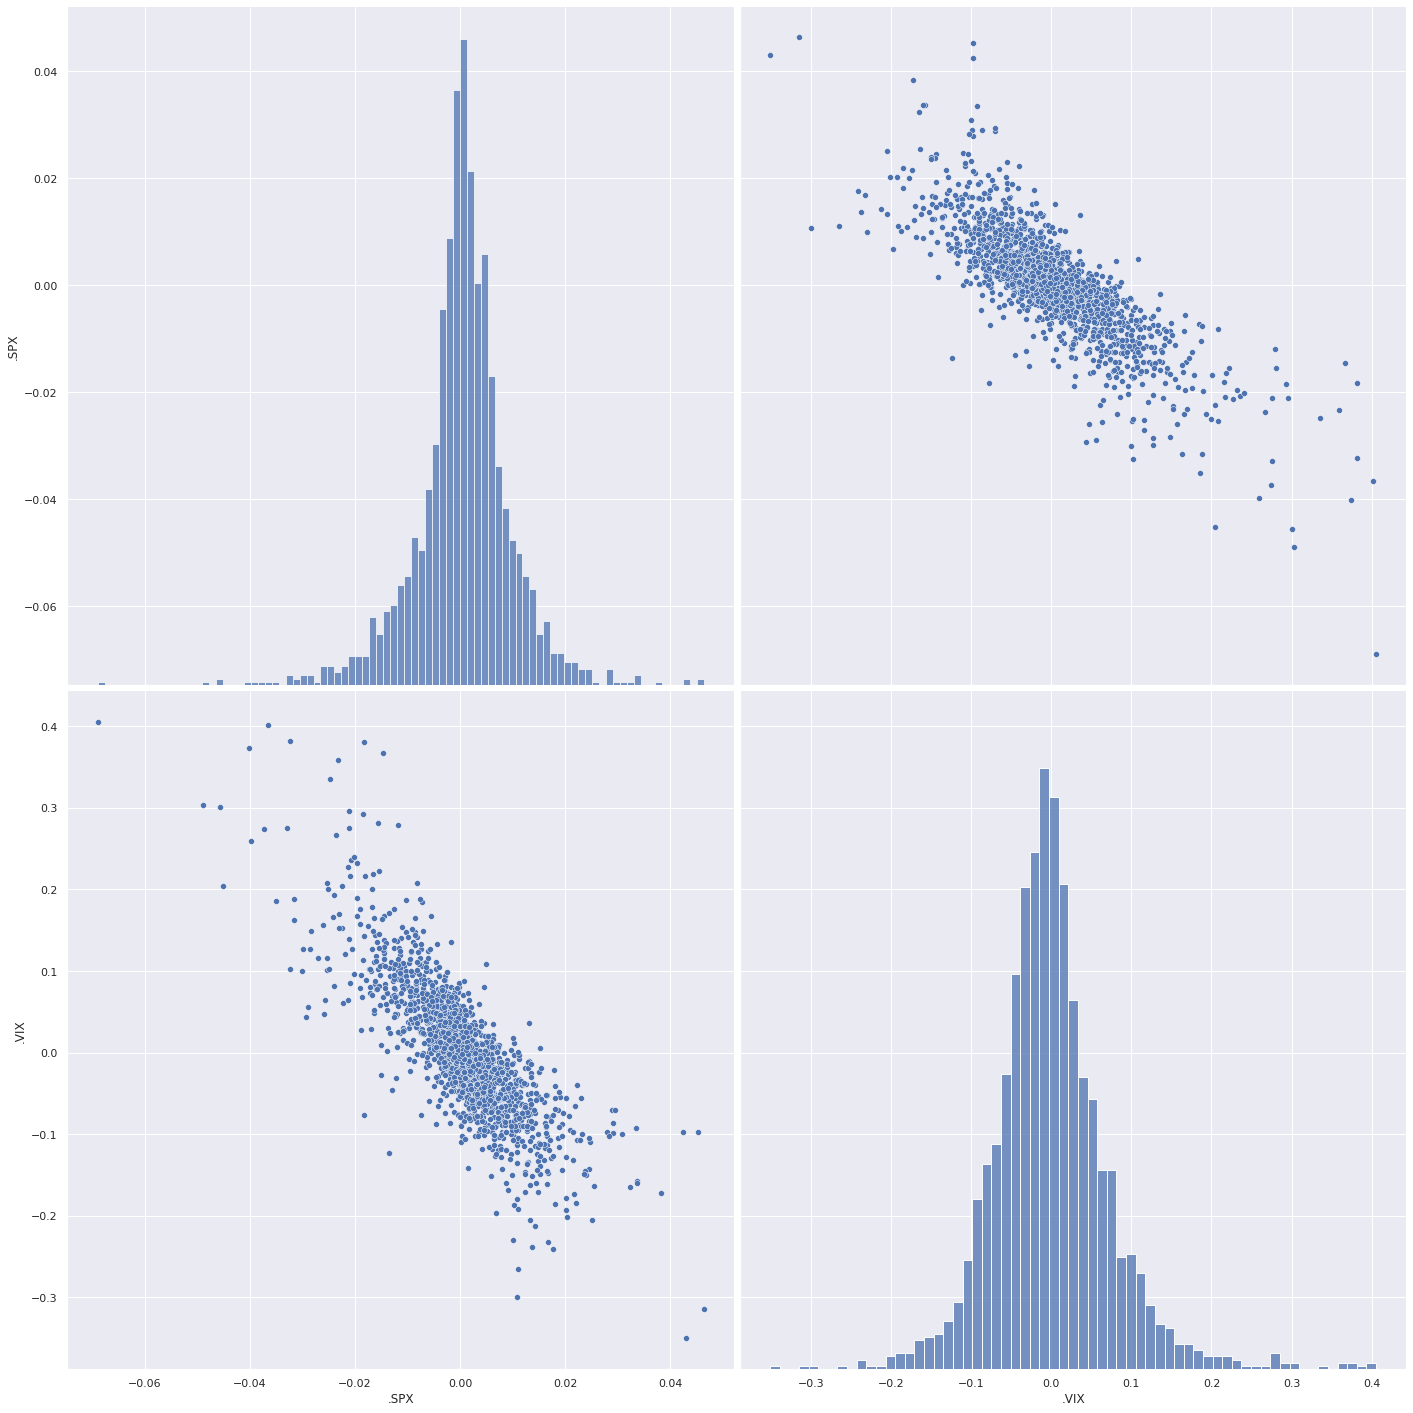

In [48]:
# plt.figure(figsize=(20,15))
sns.pairplot(rets, height=10)

Linear regression to estimate vix from spx.

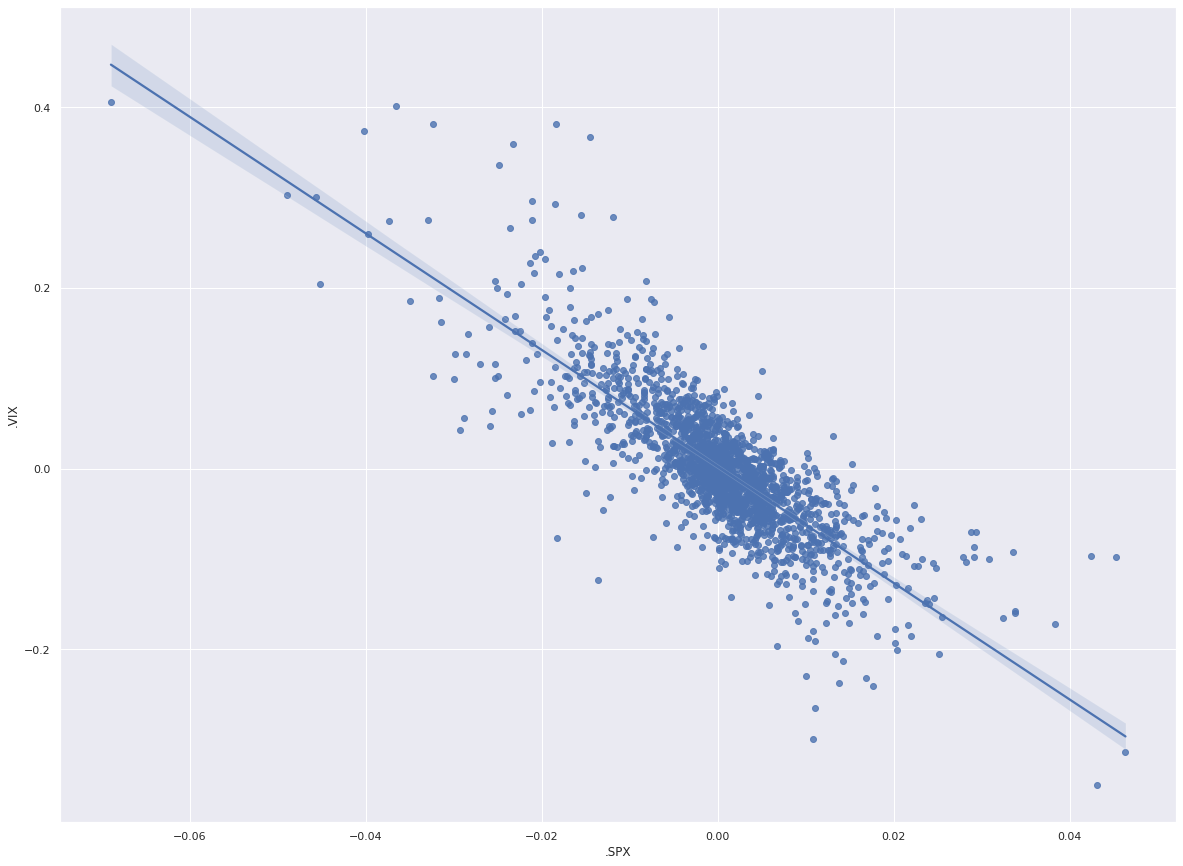

In [49]:
plt.figure(figsize=(20,15))
sns.regplot(data=rets, x='.SPX', y= '.VIX');
# rets.columns

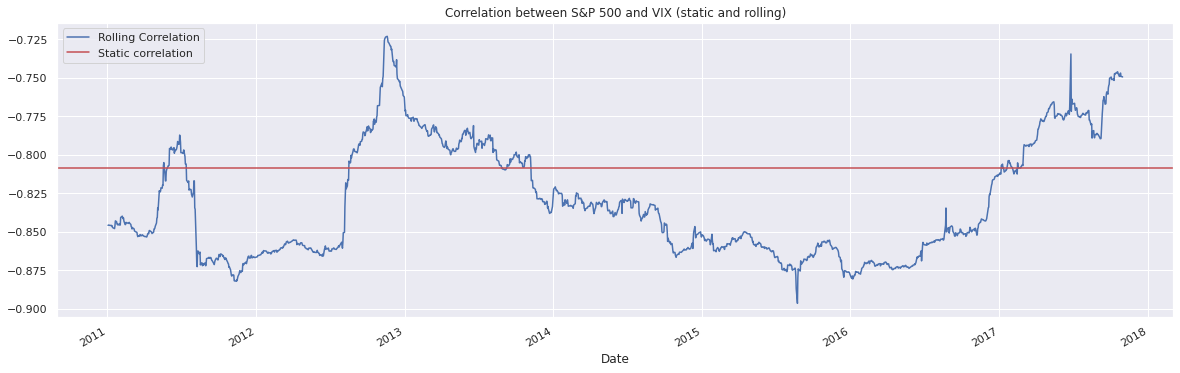

In [50]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(20, 6), label='Rolling Correlation')
ax.set_title('Correlation between S&P 500 and VIX (static and rolling)')
ax.axhline(rets.corr().iloc[0, 1], c='r', label='Static correlation')
ax.legend();


In [51]:
url = 'https://raw.githubusercontent.com/yhilpisch/py4fi/master/jupyter36/source/fxcm_eur_usd_tick_data.csv'
tick = pd.read_csv(url,
                  parse_dates=True,
                  index_col=0)
tick

,Bid,Ask
2017-11-10 12:00:00.007,1.16395,1.16394
2017-11-10 12:00:00.053,1.16394,1.16394
2017-11-10 12:00:00.740,1.16394,1.16393
2017-11-10 12:00:00.746,1.16394,1.16391
2017-11-10 12:00:00.756,1.16394,1.16392
...,...,...
2017-11-10 13:59:59.716,1.16481,1.16481
2017-11-10 13:59:59.757,1.16481,1.16482
2017-11-10 14:00:00.005,1.16482,1.16482
2017-11-10 14:00:00.032,1.16482,1.16483


In [52]:
tick['Mid'] = tick.mean(axis=1)

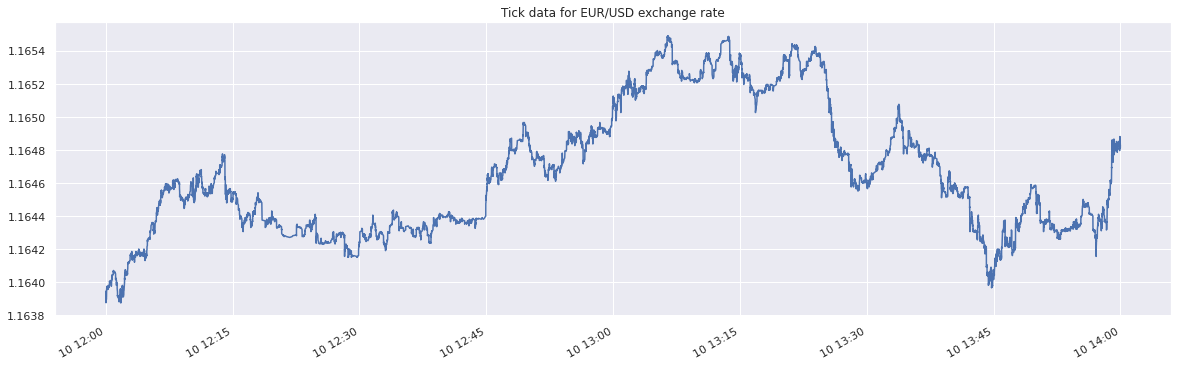

In [53]:
tick['Mid'].plot(figsize=(20, 6),
                title='Tick data for EUR/USD exchange rate');

In [54]:
tick_resam = tick.resample(rule='5min', label='right').last()
tick_resam

,Bid,Ask,Mid
2017-11-10 12:05:00,1.16425,1.16427,1.164260
2017-11-10 12:10:00,1.16454,1.16455,1.164545
2017-11-10 12:15:00,1.16449,1.16449,1.164490
2017-11-10 12:20:00,1.16437,1.16437,1.164370
2017-11-10 12:25:00,1.16429,1.16430,1.164295
2017-11-10 12:30:00,1.16424,1.16424,1.164240
2017-11-10 12:35:00,1.16433,1.16433,1.164330
2017-11-10 12:40:00,1.16439,1.16439,1.164390
2017-11-10 12:45:00,1.16450,1.16451,1.164505
2017-11-10 12:50:00,1.16488,1.16489,1.164885


In [55]:
tick_resam.shape, tick.shape

((25, 3), (17352, 3))

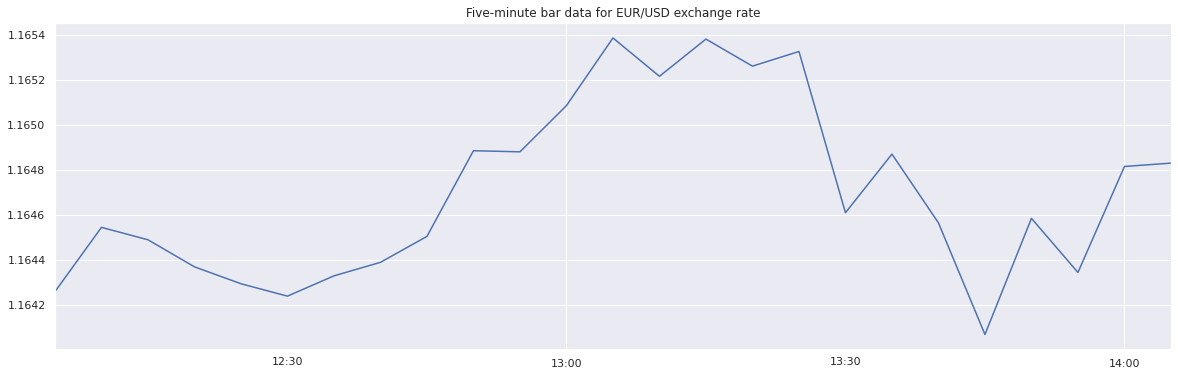

In [56]:
tick_resam['Mid'].plot(figsize=(20, 6),
                      title='Five-minute bar data for EUR/USD exchange rate');